In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import librosa

In [43]:
filename='flow/20170622-14-37-19-582_001jun_IPEC_006_1.csv'
data=pd.read_csv(filename)

In [44]:
# convert timestemps in second
data.timestamp=data.apply(lambda x: x.timestamp*1e-6,axis=1)

In [45]:
data.head()

,timestamp,X,VX,Y,VY
0,0.477129,134,-119.1580,85,64.295000
1,0.477760,130,-78.7517,84,-4.832820
2,0.479460,131,-85.9986,84,19.682300
3,0.481294,132,-120.4500,84,44.982900
4,0.481298,129,-65.2547,84,-0.127036


In [46]:
data.describe()

,timestamp,X,VX,Y,VY
count,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000
mean,1.371178,134.715221,0.665468,105.719040,0.239466
std,0.633960,14.227014,34.420378,24.493764,18.397811
min,0.477129,97.000000,-530.328000,44.000000,-299.775000
25%,0.747464,126.000000,-5.942530,87.000000,-3.382610
50%,1.351314,135.000000,-1.673350,92.000000,-0.384759
75%,1.950528,148.000000,17.440200,131.000000,3.278030
max,2.517170,160.000000,158.730000,159.000000,240.197000


In [47]:
last_time=data.iloc[-1].timestamp
windows_shift=0.01
n_fft=512
n_frames=math.ceil(last_time/windows_shift)
print('Number of frames = ',n_frames)
times=[windows_shift*i for i in range(n_frames)]
indices=[i for i in range(n_frames-1)]
data['frame_index']=pd.cut(data['timestamp'],times,labels=indices,include_lowest=True)

Number of frames =  252


In [48]:
# convert velocities to pixel/second to pixel/windows_shift
data['VX']=data.apply(lambda x: x['VX']*windows_shift,axis=1)
data['VY']=data.apply(lambda x: x['VY']*windows_shift,axis=1)

# add speed
data['speed']=np.sqrt(data.VX**2+data.VY**2)

In [49]:
data.head(20)

,timestamp,X,VX,Y,VY,frame_index,speed
0,0.477129,134,-1.191580,85,0.642950,47,1.353975
1,0.477760,130,-0.787517,84,-0.048328,47,0.788999
2,0.479460,131,-0.859986,84,0.196823,47,0.882222
3,0.481294,132,-1.204500,84,0.449829,48,1.285755
4,0.481298,129,-0.652547,84,-0.001270,48,0.652548
5,0.482378,133,-1.093980,84,0.361137,48,1.152047
6,0.482470,131,-0.716150,84,0.160742,48,0.733968
7,0.482771,134,-0.893092,84,0.375020,48,0.968635
8,0.483645,132,-0.891110,84,0.324161,48,0.948239
9,0.484644,137,-5.303280,85,0.366425,48,5.315924


In [50]:
frames=data.groupby('frame_index',observed=True)

In [51]:
# number of event per frame
non_empty_frames=[k for k in frames.indices]
mean=0.0
for frame in non_empty_frames:
    #print(frame,len(frames.get_group(frame)))
    mean+=len(frames.get_group(frame))
print('average number of events per frame = ',mean/len(non_empty_frames))
print(non_empty_frames)

average number of events per frame =  9.004926108374384
[47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 2

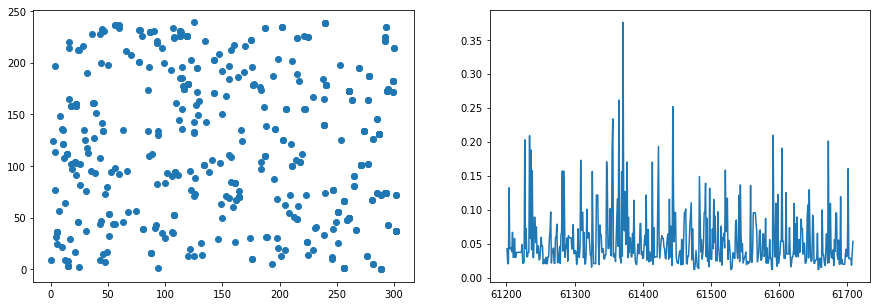

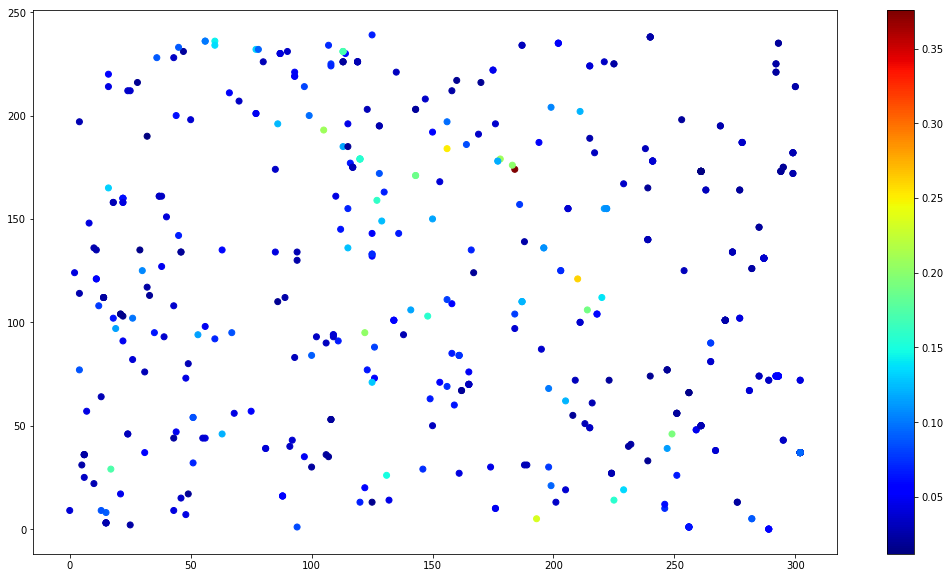

In [40]:
def print_single_frame(frame_index):
    f,ax=plt.subplots(1,2,figsize=(15,5))
    
    x=frames.get_group(frame_index)['X']
    y=frames.get_group(frame_index)['Y']
    speed=frames.get_group(frame_index)['speed']
    
    ax[0].scatter(x,y)
    
    ax[1].plot(speed)
    
    #ax[2].scatter(x.values,y.values,c=speed.values,cmap='jet')
    #ax[2].colorbar()
    
    #plt.colorbar(ax=ax[2])
    
    f=plt.figure(figsize=(18,10))
    plt.scatter(x.values,y.values,c=speed.values,cmap='jet')
    plt.colorbar()
    
print_single_frame(221)

cm=(134.71500559910413,106.25979843225085)
cm_v = (0.03697445166590145,-0.005968478224636057)


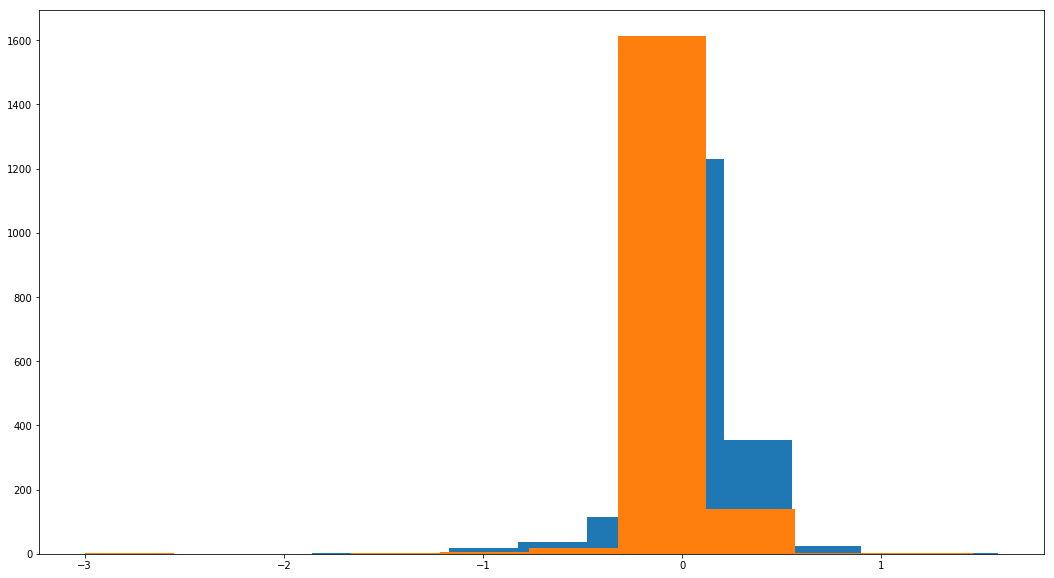

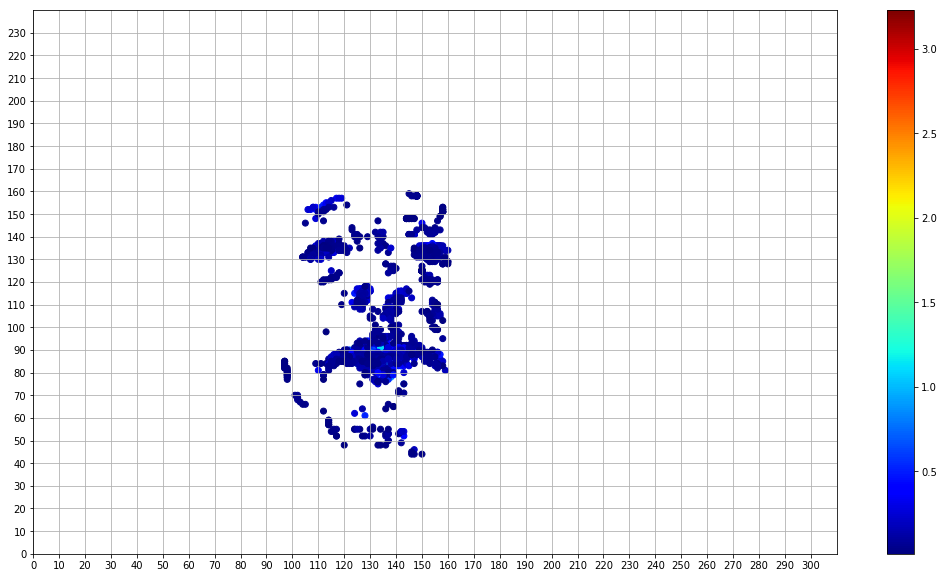

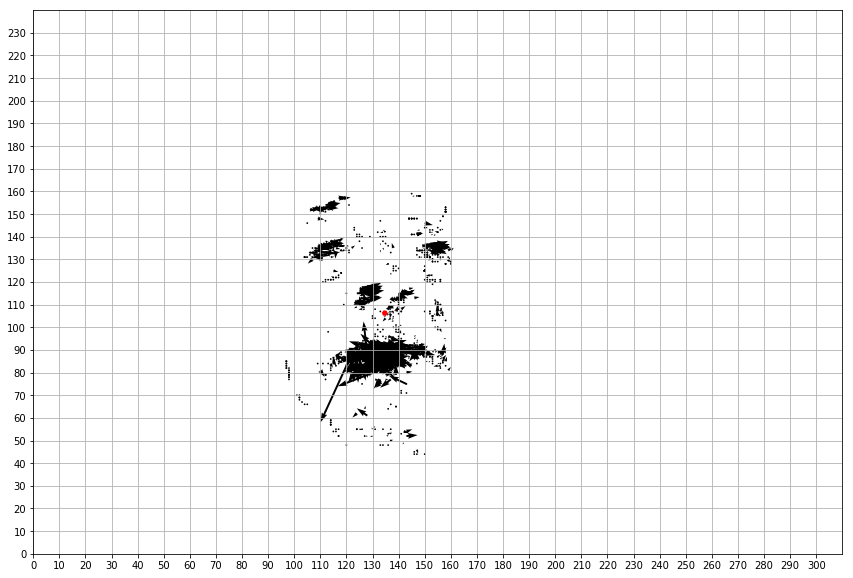

In [65]:
def print_multiple_frames(frame_start,frame_end,speed_threshold):

    subset=data.loc[(data['frame_index']<=frame_end) & (data['frame_index']>=frame_start)]

    subset=subset[subset.speed>speed_threshold]
    x=subset['X']
    vx=subset['VX']
    y=subset['Y']
    vy=subset['VY']
    speed=subset['speed']
    
    f=plt.figure(figsize=(18,10))
    plt.hist(vx)
    plt.hist(vy)

    xmax=310
    ymax=240
    #xmax=160
    #ymax=160
    
    x_ticks=[i for i in range(0,xmax,10)]
    y_ticks=[i for i in range(0,ymax,10)]
    

    #find_point=subset.loc[(subset['X']<200) & (subset['X']>190) & (subset['Y']>180) & (subset['Y']<190)]
    #print(find_point)
    ##############################
    ###############################
    
    f=plt.figure(figsize=(18,10))
    plt.scatter(x.values,y.values,c=speed.values,cmap='jet')
    
    plt.xticks(ticks=x_ticks)
    plt.yticks(ticks=y_ticks)
    
    plt.colorbar()
    plt.grid()
    plt.xlim(0,xmax)
    plt.ylim(0,ymax)
    
    ################################
    ################################
    
    f=plt.figure(figsize=(14.5,10))
    X=x.values
    Y=y.values
    U=vx.values*10
    V=vy.values*10
    
    plt.quiver(X,Y,U,V,angles='xy',scale_units='xy', scale=1)
    #plt.quiver(X,Y,U,V,angles='xy')
    
    x_cm=x.mean(axis=0)
    y_cm=y.mean(axis=0)
    
    vx_cm=vx.mean(axis=0)
    vy_cm=vy.mean(axis=0)
    
    X , Y , U , V = x_cm, y_cm , vx_cm , vy_cm
    plt.quiver(X,Y,U,V,color='r',angles='xy',scale_units='xy', scale=1)
    
    print('cm=({},{})'.format(x_cm,y_cm))
    print('cm_v = ({},{})'.format(vx_cm,vy_cm))
    
    #f=plt.figure(figsize=(14.5,10))
    X=x.values
    Y=y.values
    vx_diff=np.subtract(vx.values,vx_cm)
    vy_diff=np.subtract(vy.values,vy_cm)
    
    
    U=vx_diff
    V=vy_diff
    
    #plt.quiver(X,Y,U,V,color='r',angles='xy')
    
    plt.xticks(ticks=x_ticks)
    plt.yticks(ticks=y_ticks)
    plt.grid()
    
    plt.xlim(0,xmax)
    plt.ylim(0,ymax)
    
    #plt.xlim(50,200)
    #plt.ylim(0,ymax)
    
    
print_multiple_frames(50,250,0)

In [66]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff

init_notebook_mode(connected=True)

def plot_multiple_frames_vector_field(frame_start,frame_end,speed_threshold):
    
    subset=data.loc[(data['frame_index']<=frame_end) & (data['frame_index']>=frame_start)]

    subset=subset[subset.speed>speed_threshold]
    x=subset['X']
    vx=subset['VX']
    y=subset['Y']
    vy=subset['VY']
    speed=subset['speed']
    
    fig = ff.create_quiver(x, y, vx, vy,scale=1.0,)
    iplot(fig, filename='Quiver Plot Example')
    
plot_multiple_frames_vector_field(200,220,0)

<IPython.core.display.Javascript object>


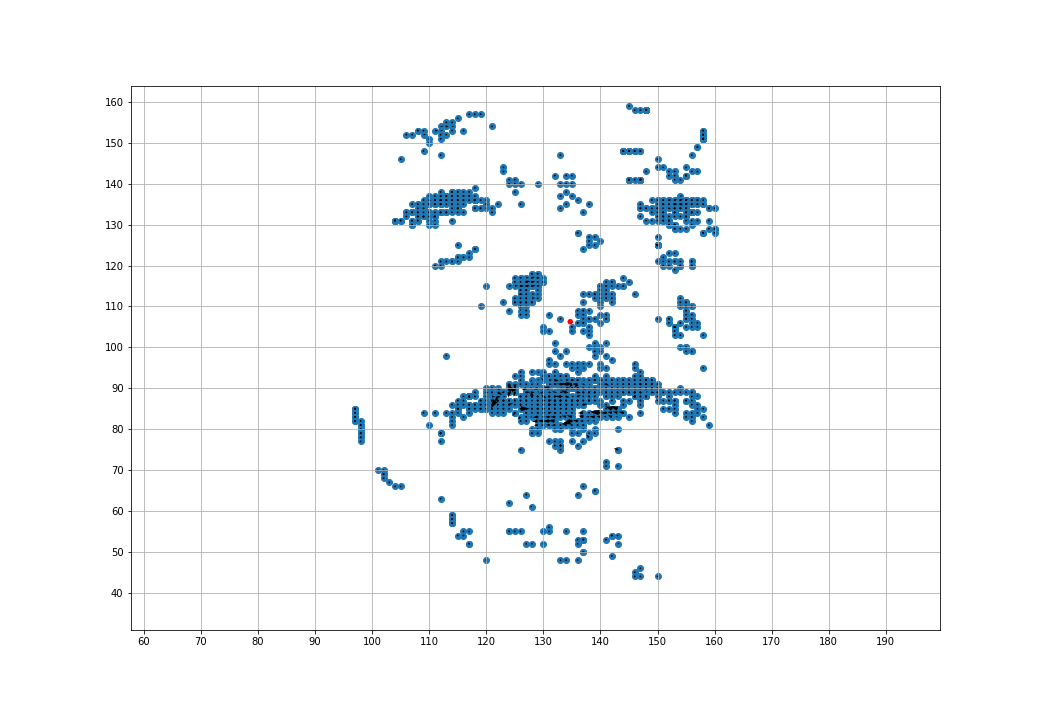

In [70]:
%matplotlib notebook

def plot_vector_field(frame_start,frame_end,speed_threshold):

    subset=data.loc[(data['frame_index']<=frame_end) & (data['frame_index']>=frame_start)]

    subset=subset[subset.speed>speed_threshold]
    x=subset['X']
    vx=subset['VX']
    y=subset['Y']
    vy=subset['VY']
    speed=subset['speed']
    

    xmax=310
    ymax=240
    #xmax=160
    #ymax=160
    
    x_ticks=[i for i in range(0,xmax,10)]
    y_ticks=[i for i in range(0,ymax,10)]
    
    ################################
    ################################
    
    f=plt.figure(figsize=(14.5,10))
    X=x.values
    Y=y.values
    U=vx.values
    V=vy.values
    
    plt.scatter(x,y)
    plt.quiver(X,Y,U,V,angles='xy',scale_units='xy', scale=1)
    #plt.quiver(X,Y,U,V,angles='xy')
    
    x_cm=x.mean(axis=0)
    y_cm=y.mean(axis=0)
    
    vx_cm=vx.mean(axis=0)
    vy_cm=vy.mean(axis=0)
    
    X , Y , U , V = x_cm, y_cm , vx_cm , vy_cm
    plt.quiver(X,Y,U,V,color='r',angles='xy',scale_units='xy', scale=1)

    X=x.values
    Y=y.values
    vx_diff=np.subtract(vx.values,vx_cm)
    vy_diff=np.subtract(vy.values,vy_cm)
    
    
    U=vx_diff
    V=vy_diff

    plt.xticks(ticks=x_ticks)
    plt.yticks(ticks=y_ticks)
    plt.grid()
    
    plt.xlim(0,xmax)
    plt.ylim(0,ymax)
    
    #plt.xlim(50,200)
    #plt.ylim(0,ymax)
    
    
plot_vector_field(50,250,0)

In [29]:
def print_multiple_frames_spatial_average(frame_start,frame_end,speed_threshold):
    
    subset=data.loc[(data['frame_index']<=frame_end) & (data['frame_index']>=frame_start)]
    
    xmax=310
    ymax=250
    
    x_boxes=[i for i in range(0,xmax+1,10)]
    y_boxes=[i for i in range(0,ymax+1,10)]
    
    x_boxes_index=[i for i in range(len(x_boxes)-1)]
    y_boxes_index=[i for i in range(len(y_boxes)-1)]
    
    frames = subset.groupby('frame_index',observed=True)
    non_empty_frames=[k for k in frames.indices]
    
    result=dict()
    
    for frame in non_empty_frames:
        frame_data=frames.get_group(frame)
        
        frame_data['X_box'] = pd.cut(frame_data['X'],x_boxes,labels=x_boxes_index,include_lowest=True)
        frame_data['Y_box'] = pd.cut(frame_data['Y'],y_boxes,labels=y_boxes_index,include_lowest=True)
        print(frame_data)
        
        frame_data_boxed = frame_data.groupby(['X_box','Y_box'],observed=True)
        
        grid=dict()
        
        # spatial average over boxes
    
        for k in frame_data_boxed.indices:
            print('grid indices = ',k)
            print('x center = ',x_boxes[k[0]]+5.0)
            print('y center = ',y_boxes[k[1]]+5.0)
            box=frame_data_boxed.get_group(k)
            vx_box=box.VX.mean()
            vy_box=box.VY.mean()
            
            grid[k]={'x':x_boxes[k[0]]+5.0,
                    'y':y_boxes[k[1]]+5.0,
                    'vx':vx_box,
                    'vy':vy_box}
    
        #print(grid)
            
            
    
print_multiple_frames_spatial_average(150,151,20)

/home/raffaele/anaconda3/envs/event_based/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/raffaele/anaconda3/envs/event_based/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


       timestamp    X          VX    Y          VY       speed frame_index  \
27315   1.500342  258   15.191700  232  -13.847500   20.555802         150   
27316   1.500342  258   15.191700  232  -13.847500   20.555802         150   
27317   1.500414  235   24.277500  156   33.788400   41.605925         150   
27318   1.500614  224   89.728500  159   40.364400   98.389474         150   
27319   1.501075  217   16.253100   44   11.704500   20.028944         150   
27320   1.501114  282  -51.624100  132   52.744400   73.803926         150   
27321   1.501114  282  -51.624100  132   52.744400   73.803926         150   
27322   1.501177  145    1.882700   34  -10.900700   11.062089         150   
27323   1.501434  246   73.881600  148   19.969400   76.532789         150   
27324   1.501445   97  -10.410300   87    6.201960   12.117700         150   
27325   1.501538  219   97.853900  165 -144.276000  174.330003         150   
27326   1.501560  153   -0.066287  104   -6.335060    6.335407  

grid indices =  (23, 15)
x center =  235.0
y center =  155.0
grid indices =  (16, 17)
x center =  165.0
y center =  175.0
grid indices =  (16, 9)
x center =  165.0
y center =  95.0
grid indices =  (25, 13)
x center =  255.0
y center =  135.0
grid indices =  (24, 8)
x center =  245.0
y center =  85.0
grid indices =  (24, 7)
x center =  245.0
y center =  75.0
grid indices =  (24, 12)
x center =  245.0
y center =  125.0
grid indices =  (29, 6)
x center =  295.0
y center =  65.0
grid indices =  (9, 11)
x center =  95.0
y center =  115.0
grid indices =  (28, 14)
x center =  285.0
y center =  145.0
grid indices =  (28, 0)
x center =  285.0
y center =  5.0
grid indices =  (27, 14)
x center =  275.0
y center =  145.0
grid indices =  (27, 0)
x center =  275.0
y center =  5.0
grid indices =  (8, 9)
x center =  85.0
y center =  95.0
grid indices =  (8, 0)
x center =  85.0
y center =  5.0
grid indices =  (22, 6)
x center =  225.0
y center =  65.0
grid indices =  (22, 9)
x center =  225.0
y center 